# Simple NMP


In [2]:
# import the dependencies
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.integrate import odeint

# Plotting
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
%matplotlib inline

# Control system library
import control

## Transfer function

Simple transfer function
$$
\frac{-s+2}{s^2+3s+1}
$$


   -s + 2
-------------
s^2 + 3 s + 1



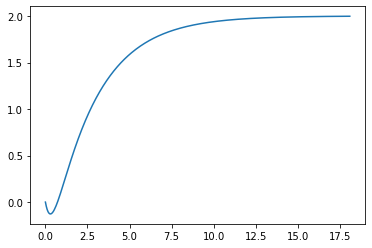

In [3]:
# numerator
num = np.array([-1, 2])
den = np.array([1, 3, 1])

# transfer function
H = control.tf(num, den)
print(H)

# step response:
t, y = control.step_response(H)
plt.plot(t, y)

Poles: [-2.61803399 -0.38196601]
Zeros: [2.]


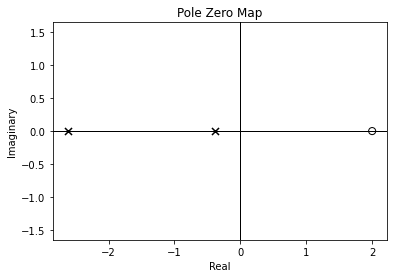

In [4]:
# Generating the pole zero map
control.pzmap(H)

# Poles:
p = control.pole(H)
z = control.zero(H)

print(f"Poles: {p}")
print(f"Zeros: {z}")

In [5]:
# Checking the input output:
io = control.tf2io(H)
print(io)

System: sys[0]
Inputs (1): u[0], 
Outputs (1): y[0], 
States (2): x[0], x[1], 


In [6]:
# Check the state space
st_space = control.tf2ss(H)
print(st_space)

A = [[-3. -1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[-1.  2.]]

D = [[0.]]




 -2 s + 0.5
-------------
s^2 + 5 s + 1

[ 0.         -0.05349158 -0.09937389 ...  0.49902918  0.499035
  0.49904079]


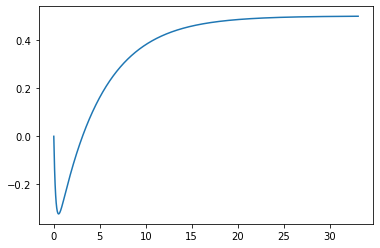

In [7]:
# numerator
num = np.array([-2, 0.5])
den = np.array([1, 5, 1])

# transfer function
H2 = control.tf(num, den)
print(H2)

# step response:
t, y = control.step_response(H2)
plt.plot(t, y)

print(y)


Zeros: [0.25]


array([0.25])

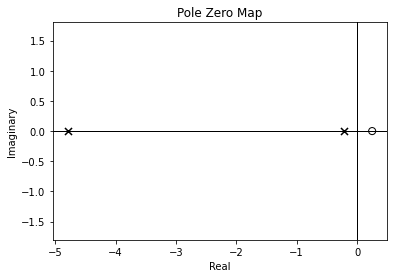

In [8]:
# Pole zero plot
control.pzmap(H2)
print(f"Zeros: {control.zero(H2)}")
control.zero(H2)

## Coding the above as a process

In [9]:
state_space = control.tf2ss(H2)
print(state_space)

io_space = control.tf2io(H2)
print(io_space)

A = [[-5. -1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[-2.   0.5]]

D = [[0.]]

System: sys[1]
Inputs (1): u[0], 
Outputs (1): y[0], 
States (2): x[0], x[1], 


In [10]:
type(io_space)

control.iosys.LinearIOSystem

In [96]:
# Convert into differential eqns:
def differential(x, t, A, B, u):
    dxdt = A@x + B*u
    return dxdt


# Initial conditions
x_init_1 = np.array([1, 1])
x_init_2 = np.array([-1, -1])
x_init_3 = np.array([0, 0])
x_init_4 = np.array([0, 1])


# Define a function:
def solve(x_init):

    # Define the parameters
    # State space parameters
    A = np.array([[-5, -1], [1, 0]])
    # A@x_init
    B = np.array([1, 0])
    u = np.array([1])
    C = np.array([-2, 0.25])
    D = np.array([0])

    # Set time step
    t = [0.5]

    # Solve the process:
    x = odeint(differential, x_init, t, args=(A, B, u,))

    # Get the output
    y = C@x.T + D*u

    return x, y, t

x_particular, y_particular, t = solve(x_init_1)
x_particular[0, 1]



1.0

In [ ]:
x1, y1, t1 = solve(x_init_1)
x2, y2, t2 = solve(x_init_2)
x3, y3, t3 = solve(x_init_3)
x4, y4, t4 = solve(x_init_4)

# Plot the graph
plt.plot(t1[:25], y1[:25])
#plt.plot(t2, y2)
#plt.plot(t3, y3)
#plt.plot(t4, y4)


In [18]:
x1.shape
t1.shape

(500,)

array([-2.75      , -1.53913602, -0.79064218, -0.32847518, -0.04360829,
        0.13148081,  0.23860962,  0.30367605,  0.3427188 ,  0.36567039,
        0.37868174,  0.38556171,  0.38866872,  0.38946289,  0.388848  ,
        0.38738331,  0.38541471,  0.38315594,  0.38073894,  0.37824498,
        0.37572394,  0.3732063 ,  0.37071052,  0.36824762,  0.36582404,
        0.36344335,  0.3611074 ,  0.35881696,  0.35657212,  0.3543726 ,
        0.35221785,  0.35010721,  0.34803991,  0.34601515,  0.34403212,
        0.34209   ,  0.34018795,  0.33832516,  0.33650084,  0.33471418,
        0.33296443,  0.33125081,  0.32957259,  0.32792902,  0.32631941,
        0.32474304,  0.32319922,  0.32168729,  0.32020659,  0.31875647,
        0.3173363 ,  0.31594546,  0.31458336,  0.3132494 ,  0.31194299,
        0.31066359,  0.30941061,  0.3081835 ,  0.30698172,  0.30580475,
        0.3046521 ,  0.30352327,  0.30241775,  0.30133507,  0.30027475,
        0.29923633,  0.29821935,  0.29722339,  0.29624799,  0.29

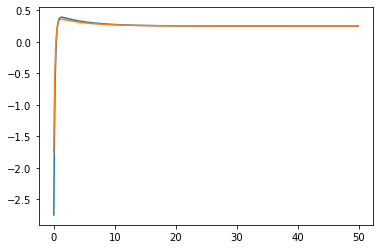

In [34]:
error = (y1 - x1[:, 0])
plt.plot(t1, error)
plt.plot(t1, y1)
error

In [13]:
dummy = np.array([1, 0])
B = np.vstack(dummy)

In [14]:
x1_minmax = np.array([x1.min(), x1.max()])

In [15]:
#
x_particular = odeint(differential, x_init_2, [0], args=(A, B, 0, ))
x_particular = np.hstack(x_particular)
x_particular


NameError: name 'A' is not defined

## Prototype custom cls environment

In [111]:

# Import dependencies
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import odeint


class SISO_nmp(Env):
    """
    Class environment for custom NMP.
    State space representation:
    ẋ = Ax + Bu
    y = Cx + D
    """

    def __init__(self):
        """
        Initialize the system parameters
        """
        # State space parameters:
        self.A = np.array([[-5, -1], [1, 0]])
        self.B = np.array([1, 0])
        self.C = np.array([-2, 0.25])
        self.D = np.array([0])

        # State matrix:
        self.x = [0, 1]
        self.step_size = 0.05
        self.time = 25
        self.n = int(self.time / self.step_size)

        # Counter to count the no. of steps
        self.tstep = 0

        # Track no. of steps for undershoot (Cap at 20 steps)
        self.track = 0

        # Action space (either negative input, positive input or zero input)
        self.action_space = Box(low=np.float32(np.array([-1])),
                                high=np.float32(np.array([1])))

        # State (the current value of u signal)
        self.state = np.array([random.uniform(-5, 5)])
        self.cpos = None

        # Observation space (the output y)
        self.observation_space = Box(low=np.float32(np.array([-10])),
                                     high=np.float(np.array([10])))

        # Set point
        self.setpoint = 0

        # Output matrix:
        self.output = [0]

        # Rewards:
        self.reward = None

    # Make the methods static:
    @staticmethod
    def process(x, t, A, B, u):
        """
        State space equation for solving: ẋ = Ax + Bu
        """
        dxdt = A@x + B*u
        return dxdt
    
    @staticmethod
    def get_val(u, x, C, D):
        """
        Calculate the output: y = Cx + D
        """
        y = C@x.T + D*u
        return y

    def step(self, action, done):
        """
        Predict the output.
        Rewards:
        For all steps (including termination): +1
        For undershoot: -5
        For opposite response: -5
        """
        # Assert the action is valid:
        error_msg = f"{action} is not a valid action."
        assert self.action_space.contains(action), error_msg

        # If action valid, get our control signal
        # Generate -ve or +ve input
        self.cpos = action*self.state

        # Get the state and output
        x_next = odeint(self.process, self.x, [self.tstep*self.step_size],
                        args=(self.A, self.B, self.cpos, ))
        y = self.get_val(self.cpos, self.x, self.C, self.D)
        self.output.append(y)

        # Model the problem:
        if(self.output[self.tstep] < self.setpoint):
            # Output goes below zero
            done = True
            reward = -5
        elif(self.output[self.tstep] < self.output[self.tstep - 1] and self.track == 30):
            # Opposite response
            done = True
            reward = -5
        elif(self.tstep == self.n):
            done = True
            reward = 1
        else:
            reward = np.abs(self.output[self.tstep] - x_next[0, 1])

        return reward, done, x_next

    def render(self):
        """
        Render the environment
        """
        pass

    def reset(self):
        """
        Reset the environment back to defaults
        """
        # Reset the state
        self.state = np.array([random.uniform(-5, 5)])
        self.x = np.array([0, 1])

        self.tstep = 0
        self.track = 0

        self.output = [0]

        return self


In [112]:
# Check if environment works:
env = SISO_nmp()
state_dim = env.observation_space.shape
action_dim = env.action_space.shape
action_bound = env.action_space.high[0]
print("State Dim: {0}\n Action Dim: {1}\n Action Bound: {2}"
      .format(state_dim, action_dim, action_bound))


State Dim: (1,)
 Action Dim: (1,)
 Action Bound: 1.0


In [106]:
# Reset the environment
env = env.reset()

In [107]:
# Loop for one episode
score = 0
while not done:
    action = env.action_space.sample()
    reward, done, next = env.step(action, done)

    # Log the undershoot:
    if (env.output[env.tstep] < env.output[env.tstep - 1]):
        env.track += 1

    # Updates
    score += reward
    env.x = np.hstack(next)
    env.tstep += 1

    


In [116]:
# Loop for 10 episodes:
scores = []
for i in range(10):
    done = False
    env = env.reset()
    score = 0

    while not done:
        action = env.action_space.sample()
        reward, done, next = env.step(action, done)

        # Log the undershoot:
        if (env.output[env.tstep] < env.output[env.tstep - 1]):
            env.track += 1

        # Updates
        score += reward
        env.x = np.hstack(next)
        env.tstep += 1
        
    scores.append(score)


In [117]:
scores

[array([376.25]),
 array([376.25]),
 array([376.25]),
 array([376.25]),
 array([376.25]),
 array([376.25]),
 array([376.25]),
 array([376.25]),
 array([376.25]),
 array([376.25])]